In [1]:
# sources
# https://www.kaggle.com/startupsci/titanic-data-science-solutions

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# sources
# https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

In [2]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = train_df_v4_drop_passengerid.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [3]:
base_directory = '/home/ubuntu/workspace/signate/titanic'
train_df_v1 = pd.read_csv(base_directory + '/input/train.csv')
test_df_v1 = pd.read_csv(base_directory + '/input/test.csv')
combine = [train_df_v1, test_df_v1]

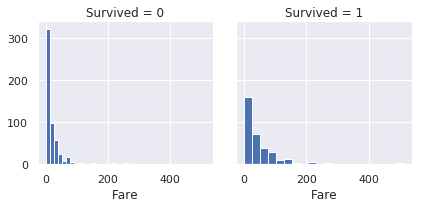

In [4]:
g = sns.FacetGrid(train_df_v1, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

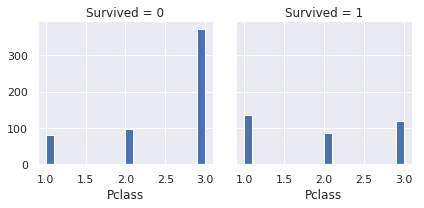

In [5]:
g = sns.FacetGrid(train_df_v1, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

In [6]:
# preview the data
train_df_v1.info()
print('_'*40)
test_df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train_df_v1["FamilySize"] = train_df_v1["SibSp"] + train_df_v1["Parch"] + 1
train_df_v2 = train_df_v1.drop(["Name", "Age", "SibSp", "Parch","Ticket", "Fare","Cabin"], axis=1)
train_df_v3 = train_df_v2.dropna()
train_df_v3.describe()
dummy_train = pd.get_dummies(train_df_v3[['Sex', 'Embarked']])
#dummy_train.head()

#元のデータに結合
train_df_v4 = pd.concat([train_df_v3.drop(['Sex', 'Embarked'], axis=1), \
                         dummy_train], axis=1)
#train_df_v4.head()
train_df_v4_drop_passengerid = train_df_v4.drop(["PassengerId"], axis=1).copy()
train_df_v4_drop_passengerid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
FamilySize    889 non-null int64
Sex_female    889 non-null uint8
Sex_male      889 non-null uint8
Embarked_C    889 non-null uint8
Embarked_Q    889 non-null uint8
Embarked_S    889 non-null uint8
dtypes: int64(3), uint8(5)
memory usage: 32.1 KB


In [8]:
#テストデータも同様に処理
test_df_v1["FamilySize"] = test_df_v1["SibSp"] + test_df_v1["Parch"] + 1
test_df_v2 = test_df_v1.drop(["Name", "Age", "SibSp", "Parch","Ticket", "Fare","Cabin"], axis=1)
#test_df_v3 = test_df_v2.dropna()
test_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
dtypes: int64(3), object(2)
memory usage: 16.4+ KB


In [9]:
dummy_test_df = pd.get_dummies(test_df_v2[['Sex', 'Embarked']])
test_df_v3 = pd.concat([test_df_v2.drop(['Sex', 'Embarked'], axis=1), \
                            dummy_test_df], axis=1).copy()
test_df_v3_drop_passengerid = test_df_v3.drop("PassengerId", axis=1).copy()
test_df_v3_drop_passengerid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass        418 non-null int64
FamilySize    418 non-null int64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: int64(2), uint8(5)
memory usage: 8.7 KB


In [10]:
#Pclass別の生存率
pclass_groupby = pd.concat([train_df_v4_drop_passengerid.groupby('Pclass')['Survived'].sum() \
                            / train_df_v4_drop_passengerid.groupby('Pclass')['Survived'].count(),\
                            train_df_v4_drop_passengerid.groupby('Pclass')['Survived'].count()], axis=1)
pclass_groupby.columns = ['Survived_rate', 'num_of_passenger']
pclass_groupby

,Survived_rate,num_of_passenger
Pclass,,
1,0.626168,214
2,0.472826,184
3,0.242363,491


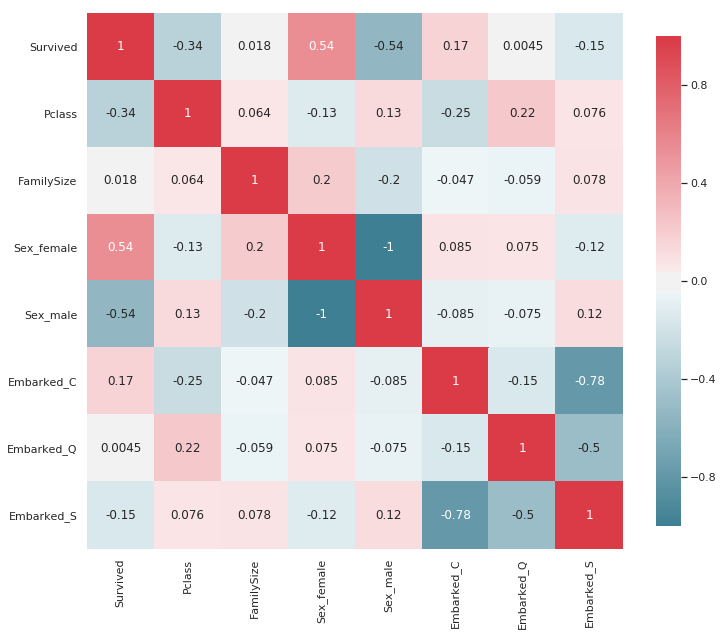

In [11]:
plot_correlation_map(train_df_v4_drop_passengerid)

In [12]:
# Model
train_X = train_df_v4_drop_passengerid.drop('Survived', axis=1)
train_y = train_df_v4_drop_passengerid['Survived']
test_X = test_df_v3_drop_passengerid
_lr = LR()
_lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#train_X.info()

In [14]:
# prediction
bench_mark = train_df_v4_drop_passengerid.Survived.sum() / train_df_v4_drop_passengerid.Survived.count()

print("bench_mark : ", bench_mark)
print("training score : ", _lr.score(train_X, train_y))

bench_mark :  0.38245219347581555
training score :  0.8008998875140607


In [15]:
#train_X.head(3)
_lr.coef_[0, :]

array([-0.86568547, -0.1282836 ,  1.91710082, -0.75344113,  0.6498619 ,
        0.3755638 ,  0.13823398])

In [16]:
Y_pred = _lr.predict(test_X)
acc_log = round(_lr.score(train_X, train_y) * 100, 2)
acc_log

80.09

In [17]:
#feature_coef = pd.concat([df(train_X), df(_lr.coef_[0, :])], axis=1)
#feature_coef.columns = ['feature name', 'coefficient']
#feature_coef['abs_coefficient'] = abs(feature_coef.coefficient)
#feature_coef.sort_values(by='abs_coefficient', ascending=False).\
#drop('abs_coefficient', axis=1)

coeff_df = pd.DataFrame(train_X.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(_lr.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Sex_male,1.917101
4,Embarked_Q,0.649862
5,Embarked_S,0.375564
1,Sex_female,-0.128284
3,Embarked_C,-0.753441
0,FamilySize,-0.865685


In [18]:
# Support Vector Machines

svc = SVC()
svc.fit(train_X, train_y)
Y_pred = svc.predict(test_X)
acc_svc = round(svc.score(train_X, train_y) * 100, 2)
acc_svc

81.1

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_y)
Y_pred = knn.predict(test_X)
acc_knn = round(knn.score(train_X, train_y) * 100, 2)
acc_knn

78.85

In [20]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
Y_pred = gaussian.predict(test_X)
acc_gaussian = round(gaussian.score(train_X, train_y) * 100, 2)
acc_gaussian

78.52

In [21]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train_X, train_y)
Y_pred = perceptron.predict(test_X)
acc_perceptron = round(perceptron.score(train_X, train_y) * 100, 2)
acc_perceptron

77.73

In [22]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train_X, train_y)
Y_pred = linear_svc.predict(test_X)
acc_linear_svc = round(linear_svc.score(train_X, train_y) * 100, 2)
acc_linear_svc

79.42

In [23]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train_X, train_y)
Y_pred = sgd.predict(test_X)
acc_sgd = round(sgd.score(train_X, train_y) * 100, 2)
acc_sgd

66.82

In [24]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
Y_pred = decision_tree.predict(test_X)
acc_decision_tree = round(decision_tree.score(train_X, train_y) * 100, 2)
acc_decision_tree

82.11

In [25]:
# Random Forest

#random_forest = RandomForestClassifier(n_estimators=100)
random_forest = RandomForestClassifier(n_estimators=100, \
                                       max_depth=100, random_state=0)
random_forest.fit(train_X, train_y)
Y_pred = random_forest.predict(test_X)
random_forest.score(train_X, train_y)
acc_random_forest = round(random_forest.score(train_X, train_y) * 100, 2)
acc_random_forest

82.11

In [26]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,82.11
8,Decision Tree,82.11
0,Support Vector Machines,81.10
2,Logistic Regression,80.09
7,Linear SVC,79.42
1,KNN,78.85
4,Naive Bayes,78.52
5,Perceptron,77.73
6,Stochastic Gradient Decent,66.82


In [27]:
#test_df_v4_passengerid = test_df_v4['PassengerId']
#df_concat = pd.concat([df(test_df_v4_passengerid), df(test_X)], axis=1)
#df_concat.info()
#df_concat.head()

submission = pd.DataFrame({
        "PassengerId": test_df_v3['PassengerId'],
        "Survived": Y_pred
    })
#submission.info()
submission.to_csv(base_directory + '/output/submission2.csv', index=False)

In [28]:
submission_df = pd.read_csv(base_directory + '/output/submission2.csv')
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
